### Curve Fitting with experimental data to obtain the sensitivity of sensor

<!--NAVIGATION-->
<a href="https://nbviewer.jupyter.org/github/sayedul79/HP-NPC/blob/main/curve-fitting-to-obtain-the-sensitivity-of-sensor.ipynb"><img align="left" src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg"></a>
<a href="https://colab.research.google.com/github/sayedul79/HP-NPC/blob/main/curve-fitting-to-obtain-the-sensitivity-of-sensor.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><a href="https://github.com/sayedul79/HP-NPC/blob/main/curve-fitting-to-obtain-the-sensitivity-of-sensor.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a></p>

### Data table
|  Lux (y) |  Voltage(x) |
| :-: | :-: |
| 80 | 2.39 |
| 100 |2.5|
|100|2.56|
|140|2.94|
|200|3.25|
|230|3.29|
|250|3.45|
|320|3.58|
|490|3.8|
|800|3.9|
|560|3.943|
|670|4.2|
|890|4.25|
|1020|4.3|

### Import essential library

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Read lux meter dataset

In [2]:
raw=pd.read_csv("lux meter.csv")

In [3]:
raw.head()

,lux,voltage
0,80,2.39
1,100,2.50
2,100,2.56
3,140,2.94
4,200,3.25


In [4]:
raw.shape

(14, 2)

### Remove duplicate

In [5]:
raw.drop_duplicates(subset="lux", 
                    keep="last",
                    ignore_index=True, 
                    inplace=True)
raw

,lux,voltage
0,80,2.390
1,100,2.560
2,140,2.940
3,200,3.250
4,230,3.290
5,250,3.450
6,320,3.580
7,490,3.800
8,800,3.900
9,560,3.943


### Identify and remove outliers

<IPython.core.display.Javascript object>


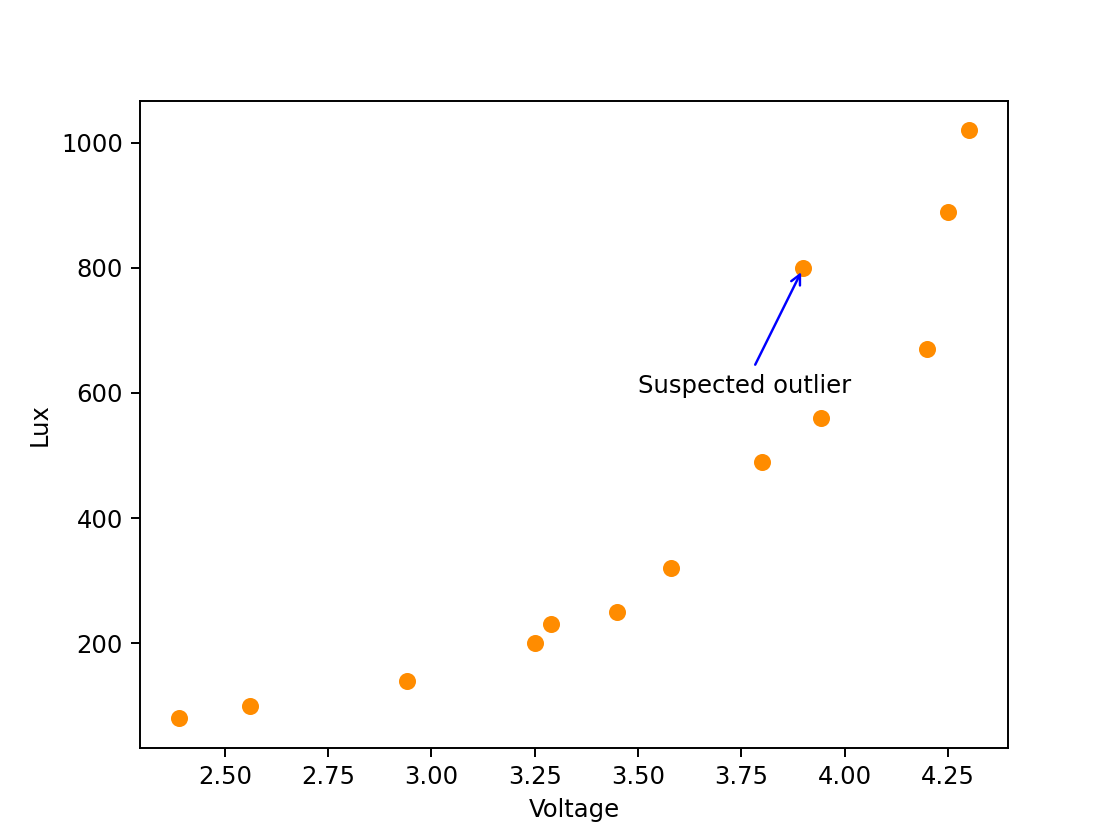

Text(0, 0.5, 'Lux')

In [6]:
%matplotlib notebook
plt.figure(1)
plt.scatter(raw.voltage, raw.lux, color="DarkOrange")
plt.annotate("Suspected outlier",xy=(3.9, 800),
             xytext=[3.5, 600], 
            arrowprops={'arrowstyle':"->", "color":'b'})
plt.xlabel("Voltage")
plt.ylabel("Lux")

In [7]:
df=raw.drop(labels=8)
df=df.set_index(np.arange(df.shape[0]))
df

,lux,voltage
0,80,2.390
1,100,2.560
2,140,2.940
3,200,3.250
4,230,3.290
5,250,3.450
6,320,3.580
7,490,3.800
8,560,3.943
9,670,4.200


### Curve fitting

In [8]:
# define third order polynomial ax**3+bx**2+cx+d
def poly3(x, a, b, c, d):
    return a*x**3+b*x**2+c*x+d

In [9]:
param, pcov=curve_fit(f=poly3, 
                      xdata=df.voltage, 
                      ydata=df.lux)

In [10]:
param=np.around(param,2)
param

array([  174.81, -1452.42,  4141.35, -3913.22])

In [11]:
polynomial_3=np.polynomial.polynomial.Polynomial(np.flip(param))
polynomial_3

Polynomial([-3913.22,  4141.35, -1452.42,   174.81], domain=[-1,  1], window=[-1,  1])

### Plot raw data and fitted curve

<IPython.core.display.Javascript object>


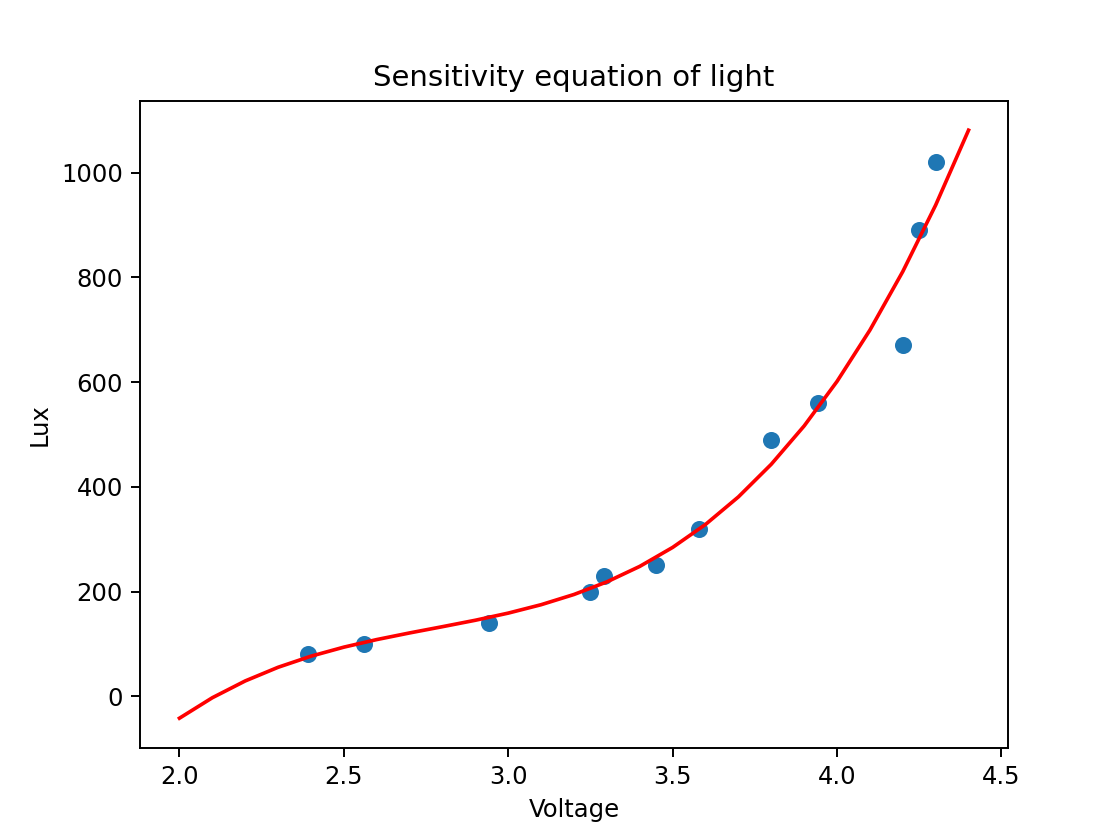

Text(0.5, 1.0, 'Sensitivity equation of light')

In [12]:
plt.figure(2)

x=np.arange(2, 4.5, .1)
plt.scatter(df.voltage, df.lux)
plt.plot(x, polynomial_3(x), 'r')
plt.xlabel('Voltage')
plt.ylabel("Lux")
plt.title("Sensitivity equation of light")

### Goodness of fit

In [13]:
# Get the standard deviations of the parameters (square roots of the 
# diagonal of the covariance)
stdevs = np.sqrt(np.diag(pcov))
stdevs

array([ 119.44820427, 1207.5482206 , 3990.72713636, 4303.71002672])

In [14]:
# Calculate the residuals
res = df.lux - poly3(df.voltage, *param)
#Calculate the sum of squares of residuals(RSS)
RSS=np.sum(res**2)
#Calulate the total sum of squares (TSS)
mean_diffe=(df.lux-np.mean(df.lux))**2
TSS=np.sum(mean_diffe)
#Calcualte coefficient of determination(R squared)
R_squared=1-RSS/TSS
RMSE=np.sqrt(RSS/(res.shape[0]-2))
print("Residual sum of square (RSS)", RSS)
print("Total sum of squares (TSS)", TSS)
print("Coefficient of determination (R squrared)", R_squared)
print("Root-mean-square error (RMSE)", RMSE)

Residual sum of square (RSS) 29827.37309735483
Total sum of squares (TSS) 1087025.0
Coefficient of determination (R squrared) 0.9725605454360711
Root-mean-square error (RMSE) 54.61444231826855
